<a href="https://colab.research.google.com/drive/15fo51GwiY4eZUfi-XFbaje7dP5VMZedC?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open"/></a>


# Basic manipulations of chemical structures with Google Colab and Rdkit

## To use this notebook - save it to your own account (File > save copy to drive)

## RDKit
`RDKit` is an open-source toolkit for cheminformatics and machine learning written in C++ and Python. It was originally developed by Greg Landrum at Rational Discovery LLC, a company that focuses on drug discovery and computational chemistry, and released in 2008. The toolkit includes an application programming interface (API) for C#, Java, C++, and Python.

The toolkit is widely used in both academia and industry for cheminformatics

## Install dependencies

First, you'll need to install the `RDKit` library. You can do this by running `pip install rdkit`:

In [1]:
!pip install rdkit

Now that we have `rdkit` we can start importing relevant modules and downloading our example ESOL dataset.

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole


Let's start looking at a specific molecule to play around with RDKit functionalities, and look at the analgesic diclofenac.

The name `diclofenac` does not contain any structural information on the molecule. Without being defined, `diclofenac` is just a common word consisting of letters. Intrinsically, computers do not know how to interpret this word as a collection of atoms and bonds representing a molecule. A very common representation of molecules to machines is known as `SMILES`.

## SMILES

`SMILES` (Simplified Molecular Input Line Entry System) is a line notation representation of molecular structures. It is a way of representing chemical compounds as strings of characters, which can be easily processed and analyzed by computer algorithms.

Each SMILES string consists of symbols that represent the elements in the molecule, as well as brackets and other characters that describe the bonding between the atoms. For example, the SMILES string for ethanol (C2H5OH) would be `CCO`. In SMILES, each carbon atom is represented by the letter "C", each hydrogen atom by the letter "H", and each oxygen atom by the letter "O". The bonding between the atoms is indicated by the arrangement of the characters in the string.

SMILES is widely used in cheminformatics and computational chemistry, as it provides a compact and standardized way of representing molecular structures in a machine-readable form. This makes it possible to compare and analyze large numbers of chemical compounds, as well as to generate predictions about their properties and behavior.

Familiarize yourself with different forms of SMILES. Specifically note that different ionization states of molecules will have different smiles, and notation of salts.

Use your search engines and find out where you can locate two forms of diclofenac structure:

In [3]:
diclofenac_sodium = 'O=C([O-])Cc1ccccc1Nc1c(Cl)cccc1Cl.[Na+]' # fill in the SMILES
diclofenac_neutral = 'O=C([O-])Cc1ccccc1Nc1c(Cl)cccc1Cl' # fill in the SMILES

## 1 - Basic molecule manipulations

In this section we will see how to do some basic operations with molecules in rdkit and to handle them in machine-readable format.

#### 1.1 - Creating and visualizing molecules

Let's start with the most basic rdkit action: creating a `Mol` object (or variable, as you prefer). `Mol` objects represent molecules, and can be created from different molecular representations (SMILES, .sdf files, etc.). We will use the basic `MolFromSmiles` function to create a variable `caffeine` representing our caffeine molecule.

In [4]:
diclofenac_salt = Chem.MolFromSmiles(diclofenac_sodium)

#Note: if you try to pass directly SMILES string, you will get the same result

The contents as a variable can be displayed in RDKit format by running a variable name with no arguments

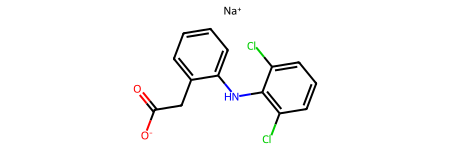

In [5]:
diclofenac_salt

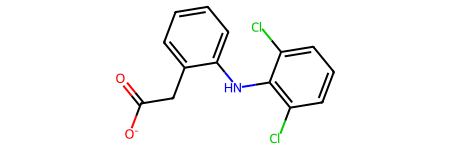

In [6]:
#Generally, when we use molecules for the purpose of descriptor generation, we use the neutral, de-salted form
diclofenac = Chem.MolFromSmiles(diclofenac_neutral)
diclofenac

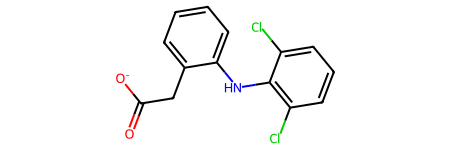

In [7]:
#We can also get to the neutral form by de-salting the salt form
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import SaltRemover
remover=SaltRemover.SaltRemover()
saltstripped=remover.StripMol(diclofenac_salt)
saltstripped

Some chemical representations are very tricky, and salt stoichiometry can trip up de-salting to give unexpected results.

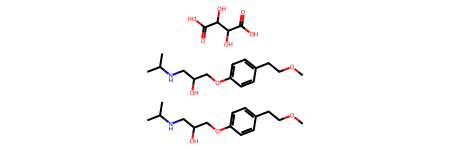

In [8]:
#We can also get a de-salted form by stripping salts. What happens if we have a complex salt? We can take the largest fragment.
metroprolol_tartrate = 'O=C(O)C(O)C(O)C(O)=O.OC(CNC(C)C)COC1=CC=C(CCOC)C=C1.OC(CNC(C)C)COC2=CC=C(CCOC)C=C2'
metroprolol_salt=Chem.MolFromSmiles(metroprolol_tartrate)
metroprolol_salt

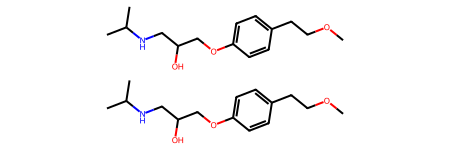

In [9]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import SaltRemover
remover=SaltRemover.SaltRemover()
saltstripped=remover.StripMol(metroprolol_salt)
saltstripped

We can see that while the salt stripper removed one of the counter-ions, because tartaric acid has a net +2 charge, the stoichiometry means that there are two compies of the metroprolol. For salts, it is often safer to pick the largest fragment using the standardizer, below.

[09:34:17] Running LargestFragmentChooser
[09:34:17] Fragment: O=C(O)C(O)C(O)C(=O)O
[09:34:17] New largest fragment: O=C(O)C(O)C(O)C(=O)O (16)
[09:34:17] Fragment: COCCc1ccc(OCC(O)CNC(C)C)cc1
[09:34:17] New largest fragment: COCCc1ccc(OCC(O)CNC(C)C)cc1 (44)
[09:34:17] Fragment: COCCc1ccc(OCC(O)CNC(C)C)cc1
[09:34:17] New largest fragment: COCCc1ccc(OCC(O)CNC(C)C)cc1 (44)


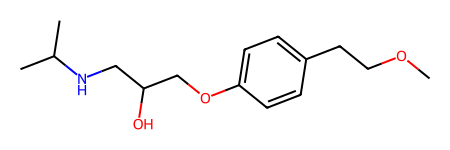

In [10]:
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
largest_Fragment = rdMolStandardize.LargestFragmentChooser()
metroprolol = largest_Fragment.choose(metroprolol_salt)
metroprolol

In [11]:
print('Number of atoms in metroprolol_tartrate: '+str(metroprolol_salt.GetNumAtoms()))
print('Number of atoms in metroprolol after standardizing and taking largest fragment: '+str(metroprolol.GetNumAtoms()))

Number of atoms in metroprolol_tartrate: 48
Number of atoms in metroprolol after standardizing and taking largest fragment: 19


Another interesting option is saving the mol object as an image. This way, you can download it or save it in your working directory. We can create an image file using the function `MolToImage` and our mol object as the argument.

In [12]:
from rdkit.Chem import Draw

#Create image file
im = Draw.MolToImage(metroprolol)

#Save image as a PNG file in our current directory
im.save('diclofenac.png')

##### Exercise 1: creating a GridImage

It is possible to create an image file containing a grid of molecules. This can be very useful when you have to show and compare molecules that are related. In this exercise, you have to create additional mol objects, and save all the as a grid image.

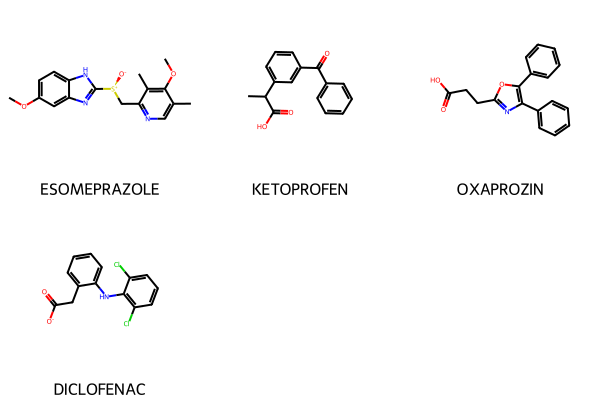

In [14]:
####YOUR CODE HERE
esomeprazole = Chem.MolFromSmiles('COc1ccc2[nH]c([S@@+]([O-])Cc3ncc(C)c(OC)c3C)nc2c1') # insert SMILES
ketoprofen = Chem.MolFromSmiles('CC(C(=O)O)c1cccc(C(=O)c2ccccc2)c1') #insert SMILES
oxaprozin = Chem.MolFromSmiles('O=C(O)CCc1nc(-c2ccccc2)c(-c2ccccc2)o1') #insert SMILES

mols = [esomeprazole, ketoprofen, oxaprozin, diclofenac] #create a list containing the 4 mol objects we have created
names = ['ESOMEPRAZOLE', 'KETOPROFEN', 'OXAPROZIN', 'DICLOFENAC'] #create a list containing the names of the 4 molecules

#Now we create the GridImage
grid = Draw.MolsToGridImage(mols , legends=names) #pass the 'mols' list here and create the image

grid

Is it easy to see the similarities between molecules? You can run the cell below to save the `GridImage` as a `.png` file

In [15]:
#extract bytes and save file
png = grid.data

with open('./grid_mols.png','wb+') as outf:
    outf.write(png)

#### 1.2 - Playing with molecules

But what is actually a Mol object? Nothing simpler than a graph representing the molecule! In this graph, vertices represents the atoms and edges the bonds in the molecule. Therefore, we can retrieve the atoms and bonds from the graph and play with them.


In [18]:
# Find the largest molecule by number of heavy atoms
largest_mol_index = max(range(len(mols)), key=lambda i: mols[i].GetNumHeavyAtoms())
largest_mol = mols[largest_mol_index]
largest_mol_name = names[largest_mol_index]

#Get total number of atoms
n_atoms = largest_mol.GetNumAtoms()
print(f'N of atoms: {n_atoms}')

#Get total number of bonds
n_bonds = largest_mol.GetNumBonds()
print(f'N of bonds: {n_bonds}')

N of atoms: 24
N of bonds: 26


We can also get the atoms and bonds as lists and get some of their properties.

In [19]:
#create a list containing the atoms of the molecule
atoms = list(metroprolol.GetAtoms())

#print the atomic number for each atom in the molecule
for atom in atoms:
    print(atom.GetAtomicNum())

#create a list containing the bonds in the molecule
bonds = list(metroprolol.GetBonds())

#print only the first three bonds in the list
for bond in bonds[0:3]:
    print(bond.GetBondType())

8
6
6
7
6
6
6
6
8
6
6
6
6
6
6
8
6
6
6
SINGLE
SINGLE
SINGLE


It is possible to select atoms individually and get some of their attributes.

In [20]:
atom = metroprolol.GetAtomWithIdx(3)
print(atom.GetSymbol())
print(atom.GetTotalDegree()) #Get number of bonded atoms
print(atom.GetHybridization())

N
3
SP3


Watching the output, could you find the atom we have selected in the metroprolol molecule?

#### 1.3 - Canonicalization

Although SMILES are very useful to handle molecules, they are not unique, which means that different SMILES can represent the same molecule. In the example below, we use three different SMILES that map to the same molecule.


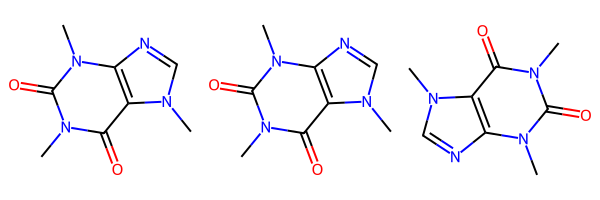

In [22]:
caffeine1 = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C' #Look up a SMILES for Caffeine and insert it here
caffeine2 = 'Cn1cnc2c1c(=O)n(C)c(=O)n2C'
caffeine3 = 'Cn1c(=O)c2c(ncn2C)n(C)c1=O'

#Create a list of SMILES
smiles_list = [caffeine1, caffeine2, caffeine3]

#Create mols from smiles
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

#Visualize mols
Draw.MolsToGridImage(mols)

As you see, although we have introduced 3 different SMILES, we are referring to the same molecule. To avoid this, we can apply `canonicalization`. This concept refers to the generation of a unique SMILES for each molecule.

##### Exercise 2 - Making a function to canonicalize and standardize

Write a canonicalization function and apply it to the previous list of non-canonical caffeine SMILES. We can use the `MolToSmiles` function in `rdkit` to get the SMILES of a mol object. By default, `rdkit` canonicalizes the SMILES when applying this function, so we can use it to create our canonicalization function.

In [23]:
def standardize_smiles(smiles):
    '''This function takes a non-canonical SMILES and
    returns the canonical version

    Args:
        -smiles: str, non-canonical SMILES of a molecule

    Out:
        - canonical_smiles: str, canonical SMILES of the molecule
    '''

    ####YOUR CODE HERE - You need to complete this section for the function to work!

    mol = Chem.MolFromSmiles(smiles) #create a mol object from input smiles


    largest_Fragment = rdMolStandardize.LargestFragmentChooser()    
    standardized_smiles = largest_Fragment.choose(mol) #standardize the input string by taking the largest fragment

    canonical_smiles = Chem.MolToSmiles(standardized_smiles) #convert the previous mol object to SMILES using Chem.MolToSmiles()

    ####END
    return canonical_smiles

If you apply now this function to previous non-canonical SMILES, you will obtain the canonical version (the same SMILES).

In [24]:
#create a new list by applying your function to list of non-canonical SMILES
standardized_smiles_list = [standardize_smiles(smiles) for smiles in smiles_list]

#check new list
for smiles in standardized_smiles_list:
    print(smiles)

Cn1c(=O)c2c(ncn2C)n(C)c1=O
Cn1c(=O)c2c(ncn2C)n(C)c1=O
Cn1c(=O)c2c(ncn2C)n(C)c1=O


[10:08:22] Running LargestFragmentChooser
[10:08:22] Fragment: Cn1c(=O)c2c(ncn2C)n(C)c1=O
[10:08:22] New largest fragment: Cn1c(=O)c2c(ncn2C)n(C)c1=O (24)
[10:08:22] Running LargestFragmentChooser
[10:08:22] Fragment: Cn1c(=O)c2c(ncn2C)n(C)c1=O
[10:08:22] New largest fragment: Cn1c(=O)c2c(ncn2C)n(C)c1=O (24)
[10:08:22] Running LargestFragmentChooser
[10:08:22] Fragment: Cn1c(=O)c2c(ncn2C)n(C)c1=O
[10:08:22] New largest fragment: Cn1c(=O)c2c(ncn2C)n(C)c1=O (24)


One important thing to consider is that there is no unique canonicalisation standard. The resulting SMILES will depend on the cheminformatics toolkit and the version that is used (therefore, we recommed to use the same package and version if you want to compare results).

#### 1.4 - Fingerprints

ML algorithms usually take vectors (or tensors) as inputs and operate with them. However, we are dealing with molecules. How can we transform molecules into numbers to feed our ML algorithms?

One common option is using [*molecular fingerprints*](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/06%3A_Molecular_Similarity/6.01%3A_Molecular_Descriptors). Molecular fingerprints are vectors that describe molecules as bit arrays (arrays of 1s and 0s). By using fingerprints, we can encode our structures and operate with them. There are many fingeprints available, but here we will use the [Morgan Fingerprint](https://www.rdkit.org/docs/GettingStartedInPython.html#morgan-fingerprints-circular-fingerprints).

In [26]:
from rdkit.Chem import AllChem
import numpy as np

#We use the GetMorganFingerprintAsBitVect to create the fingerprint
metroprolol_fp = AllChem.GetMorganFingerprintAsBitVect(metroprolol, 2, nBits=1024) #2 means radius=2 and nBits is the number of bits (lenght) of the fp

print(metroprolol_fp.GetNumBits()) #print vector length

metroprolol_fp.ToList() #visualize vector as list

1024


[0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


##### Exercise 3 - Molecular similarity using Tanimoto distance

In this exercise, we will see how we can extract chemical information using fingerprints and [Tanimoto similarity](https://en.wikipedia.org/wiki/Jaccard_index). `Tanimoto similarity` measures how similar two fingerprints are. We can use this metric to compare groups of molecules and decide which ones are chemically similar (intuitively, which molecules share more common substructures).

As an example, you have to create the `Morgan fingerprints` (r=2, nBits=1024) of toluene and theobromine, and then use the `Tanimoto similarity` to decide which one is more similar to caffeine. `Tanimoto similarity` quantifies how many bits two binary vectors have in common.

In [28]:
#Remember that we have previously created the metroprolol fingerprint and the theobromine mol object
from rdkit.DataStructs import FingerprintSimilarity

####YOUR CODE
toluene_smiles = 'Cc1ccccc1' #insert toluene SMILES
toulene = Chem.MolFromSmiles(standardize_smiles(toluene_smiles))

caffeine_smiles = 'Cn1cnc2c1c(=O)n(C)c(=O)n2C'
caffeine = Chem.MolFromSmiles(standardize_smiles(caffeine_smiles))

theobromine_smiles = 'Cn1cnc2c1c(=O)[nH]c(=O)n2C'
theobromine = Chem.MolFromSmiles(standardize_smiles(theobromine_smiles))

#Now, create the fingerprints of theobromine and toluene
toluene_fp = AllChem.GetMorganFingerprintAsBitVect(toulene, 2, nBits=1024) #insert corresponding values
theobromine_fp = AllChem.GetMorganFingerprintAsBitVect(theobromine, 2, nBits=1024) #same for theobromine

caffeine_fp = AllChem.GetMorganFingerprintAsBitVect(caffeine, 2, nBits=1024)

#Now we calculate Tanimoto Similarity
sim1 = FingerprintSimilarity(caffeine_fp , toluene_fp) #insert fingerprints to compare
sim2 = FingerprintSimilarity(caffeine_fp , theobromine_fp) #same than before

####END

#We can now print each similarity
print(f'Caffeine-toluene similarity: {round(sim1, 3)}'.format())
print(f'Caffeine-theobromine similarity: {round(sim2, 3)}')


Caffeine-toluene similarity: 0.094
Caffeine-theobromine similarity: 0.515


[10:40:02] Running LargestFragmentChooser
[10:40:02] Fragment: Cc1ccccc1
[10:40:02] New largest fragment: Cc1ccccc1 (15)
[10:40:02] Running LargestFragmentChooser
[10:40:02] Fragment: Cn1c(=O)c2c(ncn2C)n(C)c1=O
[10:40:02] New largest fragment: Cn1c(=O)c2c(ncn2C)n(C)c1=O (24)
[10:40:02] Running LargestFragmentChooser
[10:40:02] Fragment: Cn1cnc2c1c(=O)[nH]c(=O)n2C
[10:40:02] New largest fragment: Cn1cnc2c1c(=O)[nH]c(=O)n2C (21)


Does this result make sense?



#### 1.5 - Bemis-Murcko Scaffold

It is possible to decompose molecule into basic scaffolds or core molecular motifs. A common method is the [Bemis-Murcko](https://pubs.acs.org/doi/10.1021/jm9602928) decomposition. This method returns a simplified framework of a molecule that can be useful to compare or group different types of substances. `Bemis-Murcko` scaffolds can be easily obtained in `rdkit`.

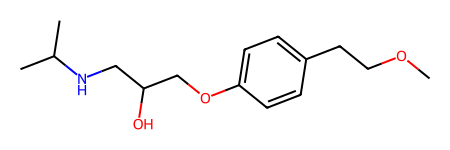

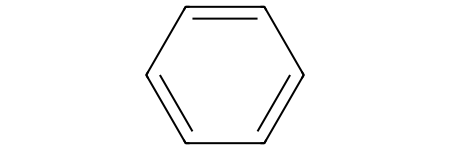

In [29]:
from rdkit.Chem.Scaffolds import MurckoScaffold

#Get Murcko Scaffold from a mol object
metroprolol_scaff = MurckoScaffold.GetScaffoldForMol(metroprolol)

#Show original molecule
display(metroprolol)

#Show Murcko scaffold
metroprolol_scaff

**Exercise:** Compare caffeine with theobromine scaffolds

In [ ]:
### YOUR CODE HERE to initialize caffeine and theobromine

#compute theobromine scaffold
theobr_scaffold = MurckoScaffold.GetScaffoldForMol(theobromine)

#draw both scaffolds as a GridImage
Draw.MolsToGridImage([caff_scaffold, theobr_scaffold], legends=['caffeine scaffold', 'thebromine scaffold'])

## 2 - Combining RDKit with Pandas

The next step is to convert the data in the `df` dataframe into mol objects that can be processed by RDKit. You can do this using the `PandasTools.AddMoleculeColumnToFrame` function.

To do that we will not use the `Compound ID` column (as it only contains names, and not the actual structure), but we will use the `smiles` column in our ESOL dataset. First, we load the dataset and take only some columns.

In [30]:
# get the dataset

url='https://drive.google.com/file/d/1i8OukQcblbsN17O5BUe8ys0LmRGNkqXW/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

#Take only Compound ID, smiles and solubility
df = df[['Compound ID', 'smiles', 'measured log solubility in mols per litre']]

#Rename solubility column
df = df.rename(columns={'measured log solubility in mols per litre': 'solubility'})
df.head()

,Compound ID,smiles,solubility
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.30
2,citral,CC(C)=CCCC(C)=CC(=O),-2.06
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87
4,Thiophene,c1ccsc1,-1.33


Now we use `AddMoleculeColumnToFrame` to add a new column containing the mol objects.

In [31]:
# Convert SMILES into Mol objects
from rdkit.Chem import PandasTools

PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles', molCol='Molecule')
df.head()

,Compound ID,smiles,solubility,Molecule
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77,<rdkit.Chem.rdchem.Mol object at 0x00000222779...
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.30,<rdkit.Chem.rdchem.Mol object at 0x00000222779...
2,citral,CC(C)=CCCC(C)=CC(=O),-2.06,<rdkit.Chem.rdchem.Mol object at 0x00000222779...
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87,<rdkit.Chem.rdchem.Mol object at 0x00000222779...
4,Thiophene,c1ccsc1,-1.33,<rdkit.Chem.rdchem.Mol object at 0x00000222779...


As you see, the final df contains a column named `Molecule` with the corresponding mol objects. These objects can be manipulated using the same functions we have learned in the previous section. It is also possible to directly visualize the molecules in `df`.

,Compound ID,smiles,solubility,Molecule
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.770,
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.300,
2,citral,CC(C)=CCCC(C)=CC(=O),-2.060,
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.870,
4,Thiophene,c1ccsc1,-1.330,
...,...,...,...,...
1123,halothane,FC(F)(F)C(Cl)Br,-1.710,
1124,Oxamyl,CNC(=O)ON=C(SC)C(=O)N(C)C,0.106,
1125,Thiometon,CCSCCSP(=S)(OC)OC,-3.091,
1126,2-Methylbutane,CCC(C)C,-3.180,

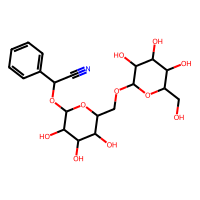
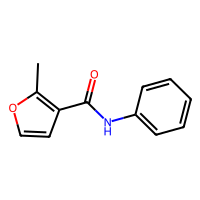
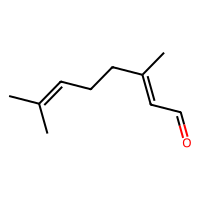
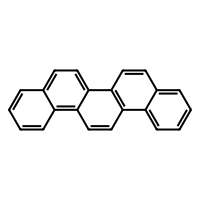
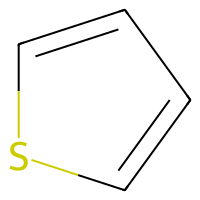
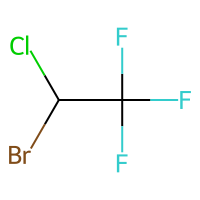
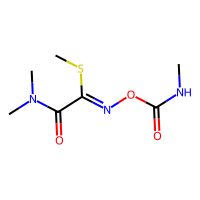
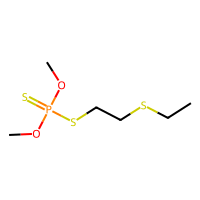
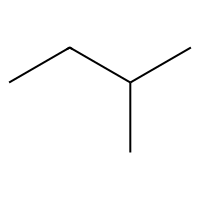
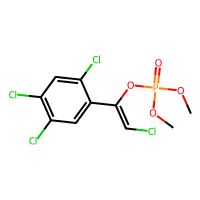

In [32]:
#display df with molecules
df

#### 2.1 - Applying functions to df

One useful option when working with pandas DataFrames is applying the same operation to all the examples we have in the dataframe. We can do these by using the `apply` function, as you see in the example below.

In [ ]:
#apply canonical smiles to our df
df['canonical_smiles'] = df['smiles'].apply(standardize_smiles) #we apply our custom function to the 'smiles' column

#drop old 'smiles' column
df = df.drop(columns='smiles')

df.head()

As you see, our `df` now contains a new column called `canonical_smiles` that is obtained by applying our previously created `canonicalize_smiles` function to the previous `smiles` column of `df`.

##### Exercise 4 - Computing Molecular Weight

We will now use the apply() function to compute the molecular weight of all our molecules. This function takes a mol object as input and returns its molecular wieight.

In [ ]:
from rdkit.Chem.Descriptors import MolWt

####YOUR CODE
df['MW'] = #use the apply function on the 'Molecule' column to compute MolWt

####END

df.head()

#SOLUTION
# %load https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/solutions/solution_01d_04.py

As you can see, a new column `MW` containing the molecular weights of the molecule appears.

#### 2.2 - Computing Molecular Descriptors

Molecular weight is one of the properties we can compute from a molecule. Apart from fingerprints, ML algorithms can take as input numbers describing the molecules we are interested in, as the molecular weight or the `logP`. We call these attributes `molecular descriptors`.

`rdkit` provides several molecular descriptors, that we can find in detail [here](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors). Below we show a basic calculation of multiple descriptors for the molecules in the dataframe.

In [33]:
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

#Define a list with the name of the descriptors you are interested in
descriptors=[
        'TPSA',
        'MolLogP',
        'NumHAcceptors',
        'NumHDonors',
        'RingCount',
        'NumAromaticHeterocycles'
    ]

#create a descriptor calculator containing the descriptors specified in the list
calculator = MolecularDescriptorCalculator(descriptors)

#Compute descriptors for each molecule in the df by using apply() and the calculator object
properties = df['Molecule'].apply(calculator.CalcDescriptors)

#create a dataframe containing the computed descriptors
df_properties = pd.DataFrame(properties.tolist(), columns=descriptors)

df_properties.head()


,TPSA,MolLogP,NumHAcceptors,NumHDonors,RingCount,NumAromaticHeterocycles
0,202.32,-3.10802,12,7,3,0
1,42.24,2.84032,2,1,2,1
2,17.07,2.87800,1,0,0,0
3,0.00,6.29940,0,0,5,0
4,0.00,1.74810,1,0,1,1


As you see, we have created a dataframe with the properties we were interested in for each molecule.

There are also specific libraries like [mordred](https://github.com/mordred-descriptor/mordred) that make possible to compute hundreds of descriptors for the same molecule. In the following session we will see how we can compute descriptors for feeding ML models in more detail.

#### 2.3 - Substructure search

In the last section, we will see how to look for structural patterns in molecules, a very important task when we are dealing with many different types of substances or we are trying to extract chemical information from our datasets.

We can use SMILES to create a pattern we are interested in. In the example below, we create two patterns and check if our `caffeine` molecule contains them.

In [ ]:
#create patterns as mol objects
patt1 = Chem.MolFromSmiles('C=O')
patt2 = Chem.MolFromSmiles('CC(N)C')

#display patterns
Draw.MolsToGridImage([patt1, patt2], legends=['pattern1', 'pattern2'], molsPerRow=2)

Now we can check if the caffeine mol object contains any of the two pattern using the method HasSubstructMatch()

In [ ]:
check_p1 = caffeine.HasSubstructMatch(patt1)
print('Contains pattern 1: {}'.format(check_p1))

check_p2 = caffeine.HasSubstructMatch(patt2)
print('Contains pattern 2: {}'.format(check_p2))

As you see, `caffeine` contains pattern 1 (carbonyl) but not pattern 2 (amine).

It is also possible to use a more detailed language for substructure searching called [SMARTS](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html). `SMARTS` are an extension of `SMILES` and allow us to specify substructures with several structural patterns. Below you can see an example of substructure matching using `SMARTS`.

In [ ]:
from IPython.display import SVG

#create pattern. This pattern means any carbon atom that is contained on a ring
patt = '[#6;r]'

patt = Chem.MolFromSmarts(patt)

#Here we get all the atoms matching the previous pattern
matches = caffeine.GetSubstructMatches(patt)

#we create a list containing the matching atoms (as indexes)
highlightAtomLists = [atom[0] for atom in matches]

#Finally, we display the image of the molecule with the highlighted matching atoms
SVG(Draw._MolsToGridSVG([caffeine], highlightAtomLists=[highlightAtomLists], molsPerRow=1))

##### Exercise 5: Substructure search

In this exercise, you will use `SMILES` and `SMARTS` to filter our solubility dataset and keep only the molecules that match certain substructure patterns. First, you have to get all the molecules that contain a phenyl ring using a `SMILES` pattern.

In [ ]:
###YOUR CODE

#create pattern
phenyl = Chem.MolFromSmiles('')

#apply HasSubstructureMatch to each molecule (we use a lambda function here)
df['phenyl'] = df['Molecule'].apply(lambda x: x.HasSubstructMatch()) #use phenyl object for the query

###END

#display rows that contain only the phenyl substructure
df_phenyl = df[df['phenyl']]
print(f'There are {len(df_phenyl)} molecules containing a phenyl ring')
df_phenyl.head()


Now we use `SMARTS` to retrieve all molecules containing a ring.

In [ ]:
#### YOUR CODE
ring = Chem.MolFromSmarts('') #look for the SMARTS specification corresponding to any ring

df['ring'] = #proceed as in the previous case

### END

#display rows that contain only the phenyl substructure
df_ring = df[df['ring']]
print(f'There are {len(df_ring)} molecules containing a ring')
df_ring.head()

## Conclusion

During this session, we have seen how to use `rdkit` to handle basic molecule operations, create fingerprints to compare different substances, compute descriptors and look for substructure matches. These are common tasks in cheminformatics and ML, so we encourage you to keep practising to master them!

Here you have more resources to get more details about chemoinformatics:
- https://iwatobipen.wordpress.com/
- https://greglandrum.github.io/rdkit-blog/
- https://www.rdkit.org/docs/Cookbook.html